# Metallicity maps

Modelling metallicity in Lyman alpha clouds with cloudy

#####
         **************************************17Jun01***************
         *                                                          *
         * title Lyman alpha cloud                                  *
         * C ionized by QSO background                              *
         * table power law spectral index -1.5 low=0.009135 hi=10   *
         * nuf(nu) = -4.6055 at 0.7 Ryd                             *
         * constant temperature 4 vary                              *
         * grid range from 4000 to 17000 in 3000                    *
         * hden -2.68 vary                                          *
         * grid range from -4.68 to 0.68 in 1.0 steps               *
         * stop neutral column density 15.                          *
         * metals -2.                                               *
         * species "C" levels=all                                   *
         * iterate                                                  *
         * save species column density "lya_a1p5_Um2_NHI15.col" "C" *
         * print last                                               *
         * C save continuum "lya_a1p5_Um2_NHI15.con"                *
         * save species labels all "speciesl_all.col"               *
         * save overview "lya_a1p5_Um2_NHI15.ovr"                   *
         * save map "lya_a1p5_Um2_NHI15.map"                        *
         * C lya_a1p5_nHm2p5.in                                     *
         *                                                          *
         ************************************************************
 
 
#####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Hydrogen [H] 

In [2]:
########
##   READING THE FILE FOR COLUMN DENSITY
########

data = pd.read_csv('column_density_NH15.txt', delimiter="\t", skiprows=None, na_values=' ', skip_blank_lines=True)
data.columns = ["C.D.", "HDEN", "T", "HI", "HII", "(H2)", "CI", "CII", "CIII", "CIV", "CV", "CVI", "CVII", "NI", "NII", "NIII", "NIV", "NV", "NVI", "NVII", "NVIII", "OI", "OII", "OIII", "OIV", "OV", "OVI", "OVII", "OVIII", "OIX", "MgI", "MgII", "MgIII", "MgIV", "MgV", "MgVI", "MgVII", "MgVIII", "MgIX", "MgX", "MgXI", "MgXII", "MgXIII"]
print (data)

    C.D.  HDEN      T      HI     HII    (H2)     CI     CII    CIII     CIV  \
0   15.0 -4.68  3.602  15.000  19.859  -3.269 -1.856   7.181  10.576  12.365   
1   15.0 -3.68  3.602  15.000  18.860   0.777  2.977   9.266  11.661  12.449   
2   15.0 -2.68  3.602  15.000  17.866   3.847  6.797  10.574  11.976  11.745   
3   15.0 -1.68  3.602  15.000  16.889   6.469  8.137  10.708  11.132   9.742   
4   15.0 -0.68  3.602  15.000  15.943   8.573  8.638  10.258   9.731   6.799   
5   15.0  0.32  3.602  15.000  15.140  10.052  8.871   9.688   8.339   3.954   
6   15.0 -4.68  3.845  15.000  20.028  -3.620 -2.580   6.776  10.333  12.306   
7   15.0 -3.68  3.845  15.000  19.029   0.551  2.338   8.946  11.504  12.474   
8   15.0 -2.68  3.845  15.000  18.033   3.651  6.235  10.460  12.023  11.971   
9   15.0 -1.68  3.845  15.000  17.054   6.279  8.113  10.743  11.325  10.092   
10  15.0 -0.68  3.845  15.000  16.098   8.122  8.702  10.362   9.983   7.156   
11  15.0  0.32  3.845  15.000  15.261   

In [3]:
########
##   READING THE FILE FOR ION FRACTION 
########
data_ion_fraction = pd.read_csv('ion_fraction_NH15.txt', delimiter="\t", skiprows=None, na_values=' ', skip_blank_lines=True)
#data.columns = ["HDEN", "T", "HI", "HII", "(H2)", "CI", "CII", "CIII", "CIV", "CV", "CVI", "CVII", "NI", "NII", "NIII", "NIV", "NV", "NVI", "NVII", "NVIII", "OI", "OII", "OIII", "OIV", "OV", "OVI", "OVII", "OVIII", "OIX", "MgI", "MgII", "MgIII", "MgIV", "MgV", "MgVI", "MgVII", "MgVIII", "MgIX", "MgX", "MgXI", "MgXII", "MgXIII"]
print (data_ion_fraction)

    #HDEN(RHO)   Temp     HI    HII    (H2)      CI    CII   CIII    CIV  \
0        -4.68  3.602 -4.859 -0.000 -22.827 -16.104 -7.067 -3.672 -1.883   
1        -3.68  3.602 -3.860 -0.000 -17.782 -10.273 -3.983 -1.588 -0.800   
2        -2.68  3.602 -2.867 -0.001 -13.719  -5.459 -1.681 -0.280 -0.510   
3        -1.68  3.602 -1.895 -0.006 -10.125  -3.147 -0.576 -0.153 -1.542   
4        -0.68  3.602 -0.990 -0.047  -7.116  -1.741 -0.121 -0.648 -3.581   
5         0.32  3.602 -0.377 -0.237  -5.023  -0.895 -0.078 -1.427 -5.812   
6        -4.68  3.845 -5.028 -0.000 -23.348 -16.998 -7.642 -4.084 -2.111   
7        -3.68  3.845 -4.029 -0.000 -18.177 -11.080 -4.473 -1.915 -0.944   
8        -2.68  3.845 -3.034 -0.000 -14.082  -6.188 -1.963 -0.400 -0.452   
9        -1.68  3.845 -2.058 -0.004 -10.478  -3.333 -0.704 -0.122 -1.355   
10       -0.68  3.845 -1.131 -0.033  -7.708  -1.818 -0.158 -0.537 -3.364   
11        0.32  3.845 -0.451 -0.190  -6.124  -0.905 -0.082 -1.321 -5.692   
12       -4.

In [4]:
extent = np.min(data["T"])-0.051, np.max(data["T"])+0.06, np.min(data["HDEN"])-.5, np.max(data["HDEN"])+0.5
#extent = (15.585, 20.287 , np.min(data["HDEN"]), np.max(data["HDEN"]))
print(extent)

(3.5509999999999997, 4.2639999999999993, -5.1799999999999997, 0.82000000000000006)


[-1.856  2.977  6.797  8.137  8.638  8.871 -2.58   2.338  6.235  8.113
  8.702  8.935 -2.859  2.077  5.987  8.101  8.738  8.972 -2.96   1.972
  5.896  8.111  8.774    nan -2.904  2.029  5.994  8.2      nan  8.996]


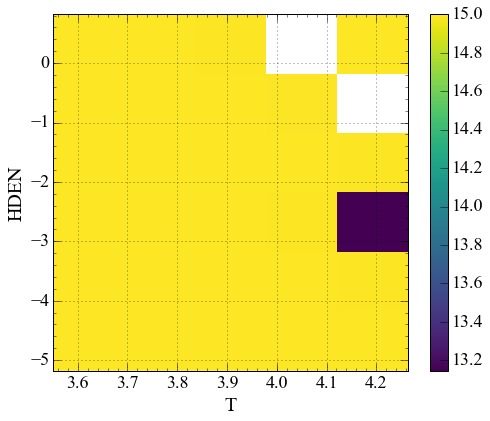

In [5]:
plt.figure(1,figsize=(8,6))
map_C0 = np.array(data["HI"]).reshape((5,6))
print(np.array(data["CI"]))
plt.figure(1)
plt.imshow(map_C0.T, interpolation='None', origin ='lower' , extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
plt.grid(True)
plt.colorbar(mappable=None)
plt.minorticks_on()
plt.xlabel('T')
plt.ylabel('HDEN')

[-1.856  2.977  6.797  8.137  8.638  8.871 -2.58   2.338  6.235  8.113
  8.702  8.935 -2.859  2.077  5.987  8.101  8.738  8.972 -2.96   1.972
  5.896  8.111  8.774    nan -2.904  2.029  5.994  8.2      nan  8.996]


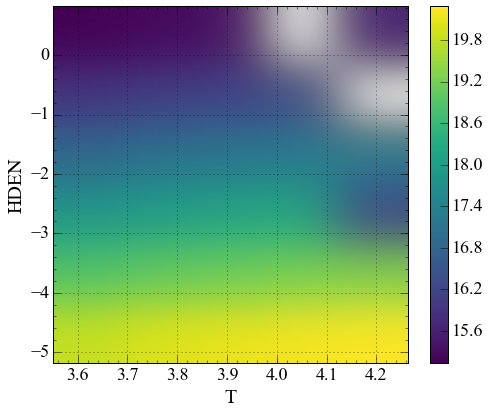

In [6]:
plt.figure(1,figsize=(8,6))
map_C0 = np.array(data["HII"]).reshape((5,6))
print(np.array(data["CI"]))
plt.figure(1)
plt.imshow(map_C0.T, interpolation='gaussian', origin ='lower' , extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
plt.grid(True)
plt.colorbar(mappable=None)
plt.minorticks_on()
plt.xlabel('T')
plt.ylabel('HDEN')

# Carbon [C] 

### Carbon ionic fraction as a function of Neutral hydrogen column density and density [?] Col. dens. HI vs dens

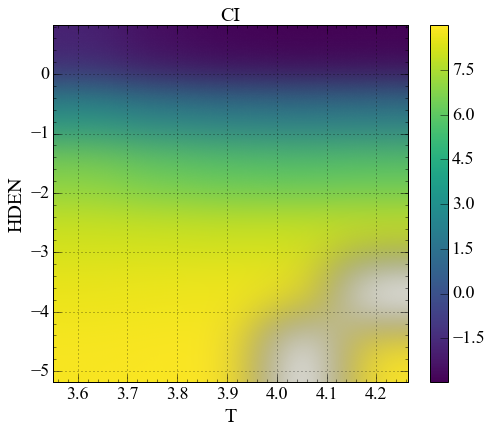

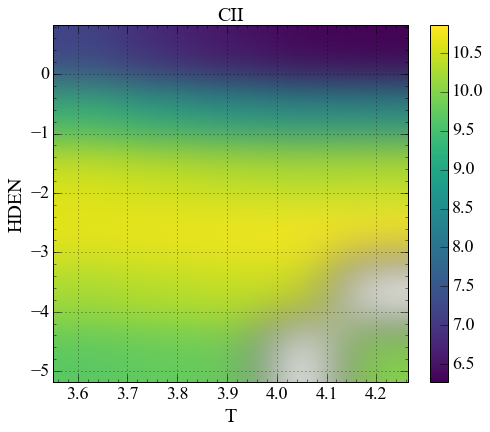

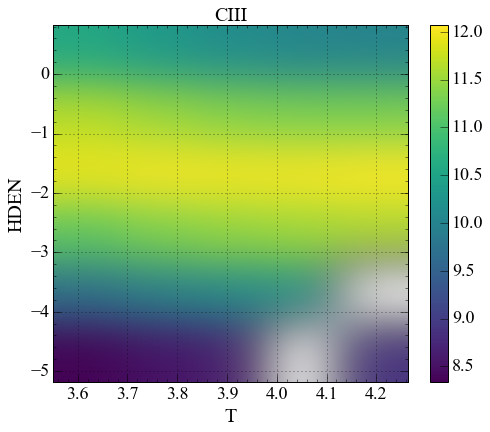

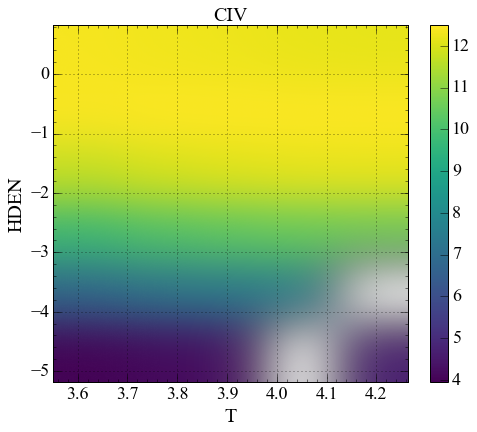

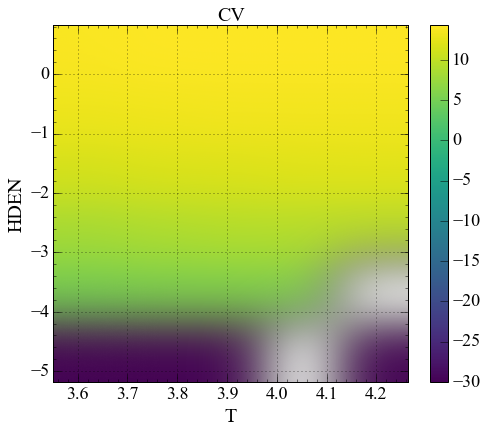

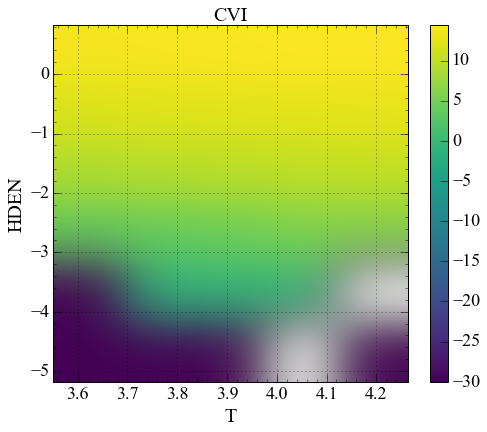

In [7]:
#all_ions = data["HI"], data["HII"], data["(H2)"], data["CI"], data["CII"], data["CIII"], data["CIV"], data["CV"], data["CVI"], data["CVII"], data["NI"], data["NII"], data["NIII"], data["NIV"], data["NV"], data["NVI"], data["NVII"], data["NVIII"], data["OI"], data["OII"], data["OIII"], data["OIV"], data["OV"], data["OVI"], data["OVII"], data["OVIII"], data["OIX"], data["MgI"], data["MgII"], data["MgIII"], data["MgIV"], data["MgV"], data["MgVI"], data["MgVII"], data["MgVIII"], data["MgIX"], data["MgX"], data["MgXI"], data["MgXII"], data["MgXIII"]
#x = 3
#plt.figure(1,figsize=(12,10))
#map_C0 = np.array(data["CI"]).reshape((5,6))
#print(np.array(data["CI"]))
#plt.figure(1)
#plt.imshow(map_C0, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
#plt.grid(True)

#for x in range(3, len(data.columns)):
#    print("{}".format(data.columns[x]))
    #map_C0 = np.array(data["data.columns[x]"]).reshape((5,6))
    #plt.imshow(map_C0, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
    

colu = data.columns
for col in colu[6:12]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title(col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()

### Carbon ionic fraction as a function of temperature and density 

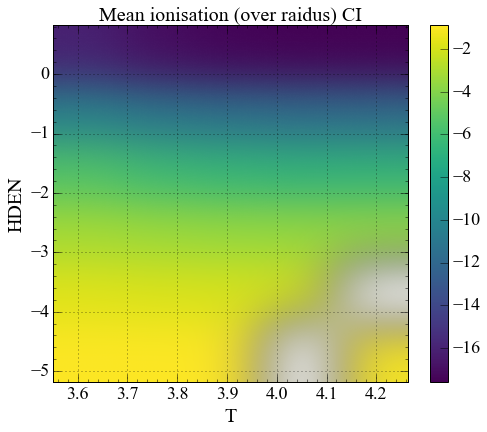

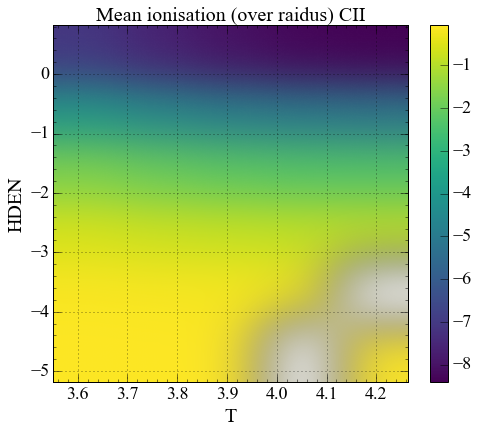

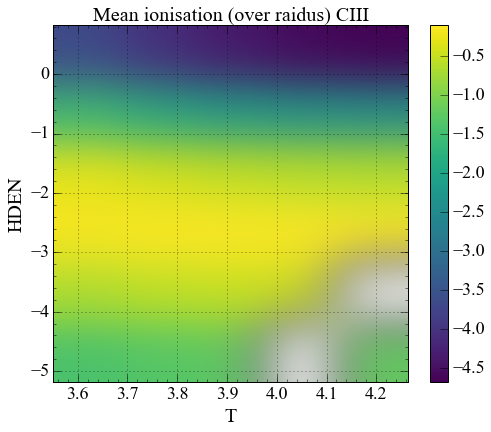

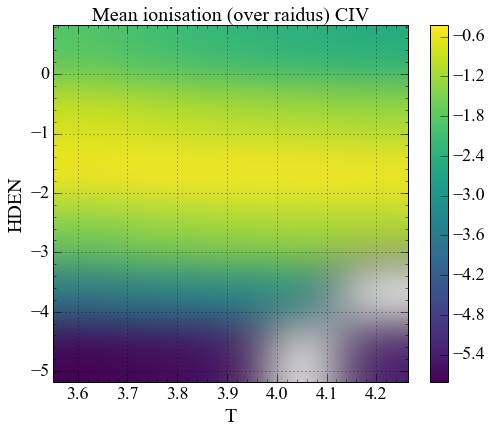

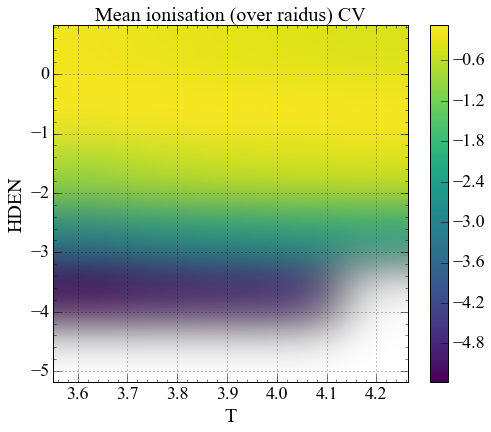

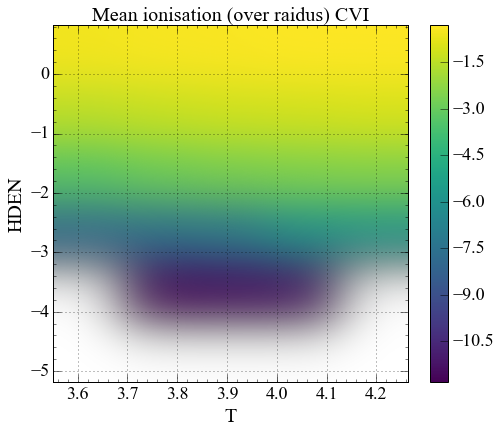

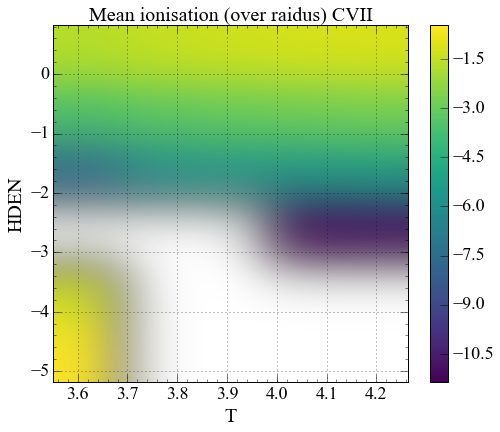

In [8]:
colu = data_ion_fraction.columns
for col in colu[5:12]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data_ion_fraction[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title("Mean ionisation (over raidus) " + col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()

In [9]:
print(data_ion_fraction['MgXIII'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6    -10.283
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    -9.803
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18    -9.502
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24    -9.283
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
Name: MgXIII, dtype: float64


# Nitrogen [N]

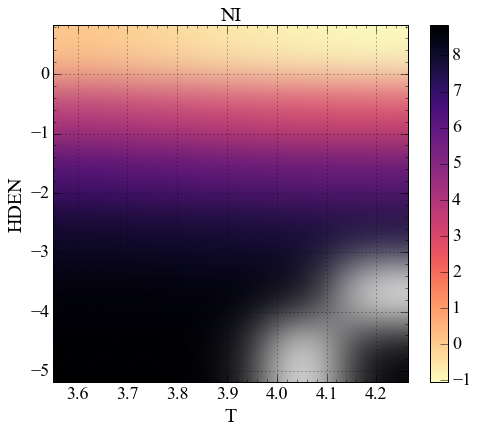

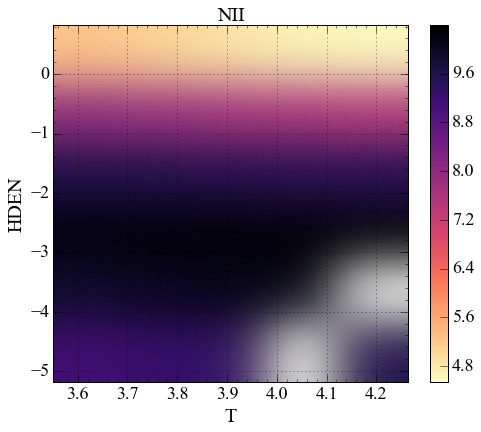

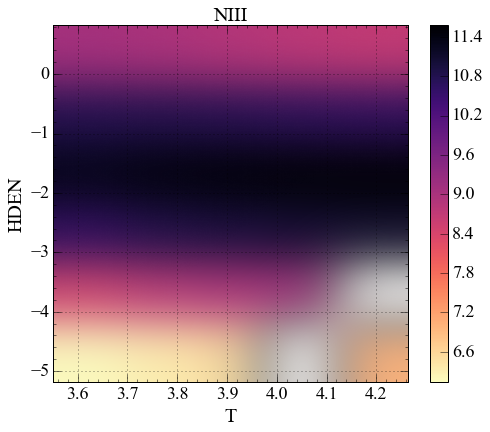

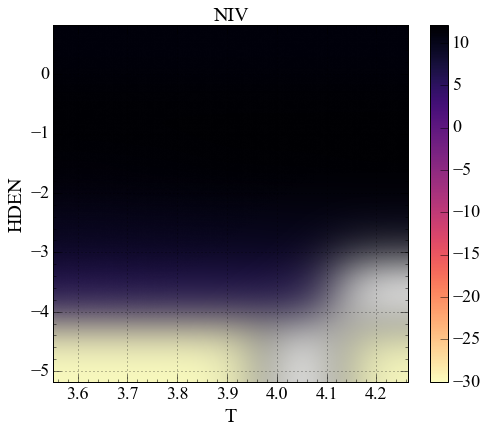

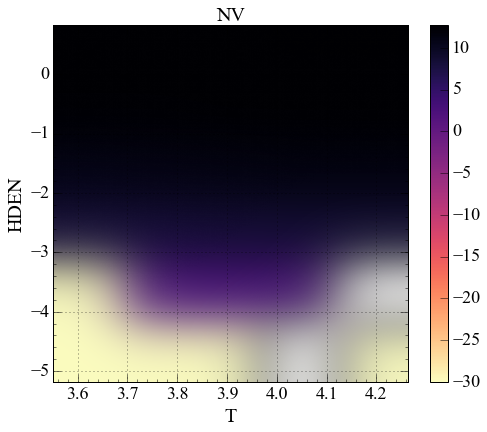

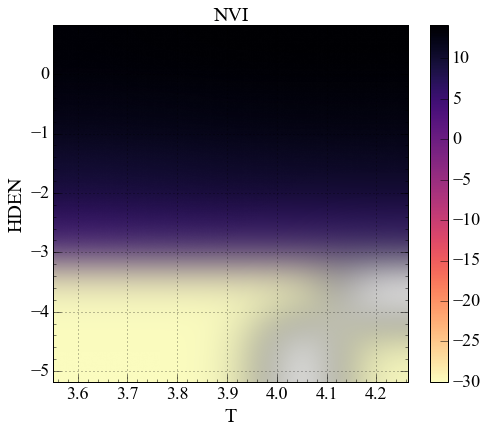

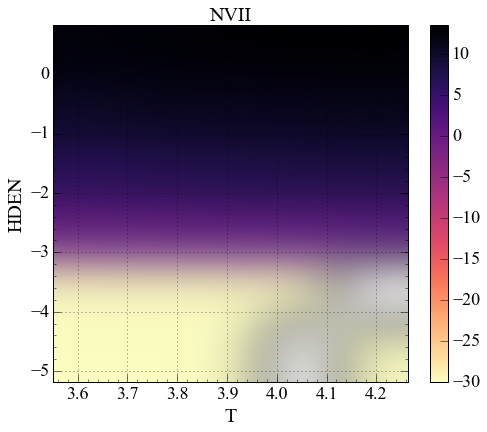

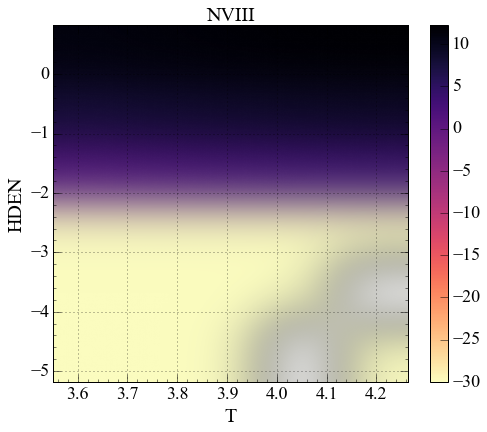

In [10]:
colu = data.columns
for col in colu[13:21]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.magma_r)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title(col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()

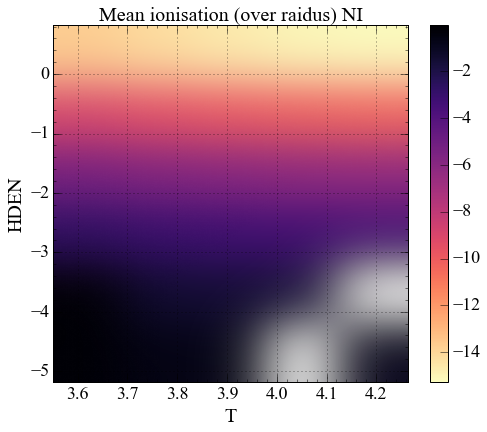

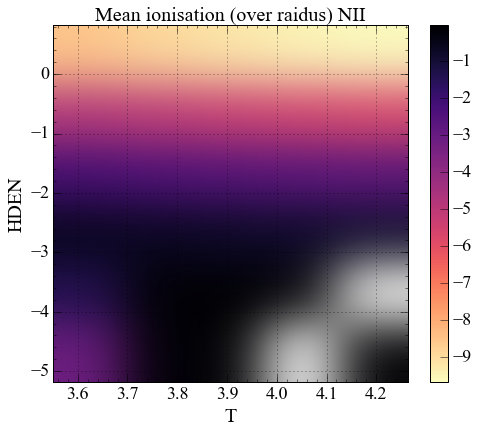

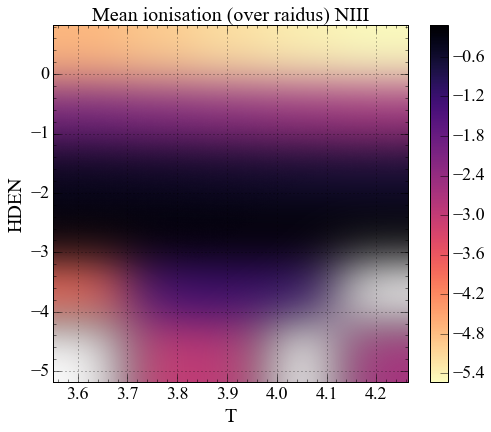

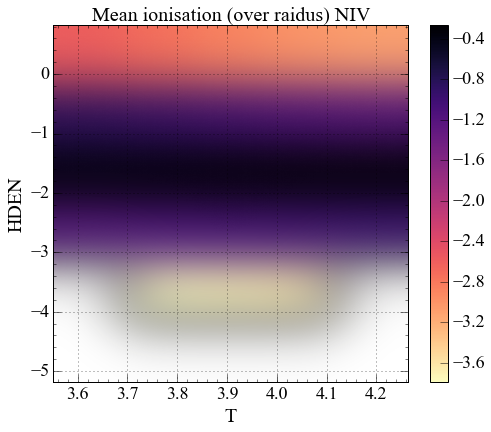

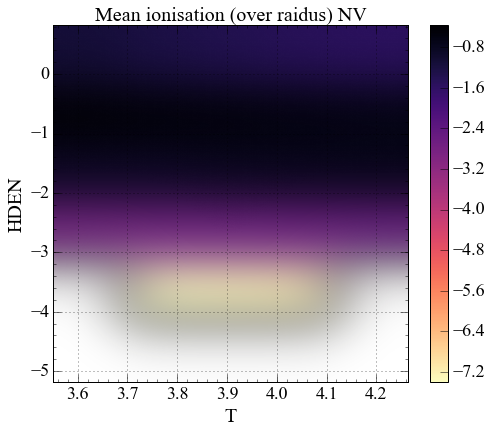

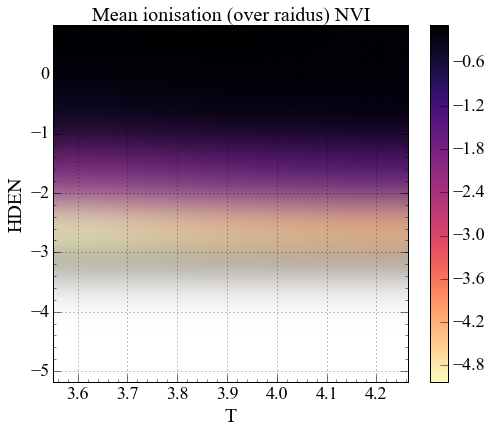

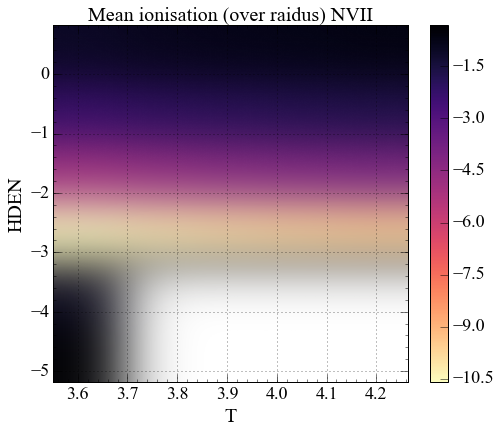

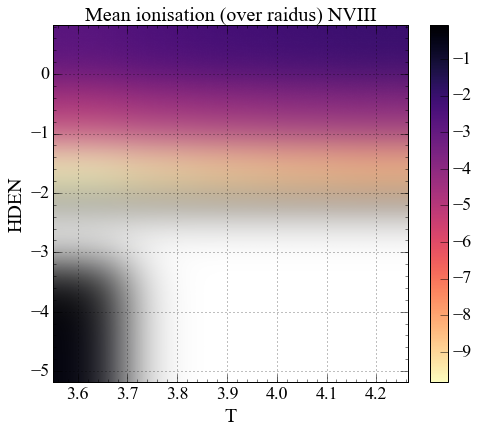

In [11]:
colu = data_ion_fraction.columns
for col in colu[12:20]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data_ion_fraction[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.magma_r)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title("Mean ionisation (over raidus) " + col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()

# Oxigen [O]

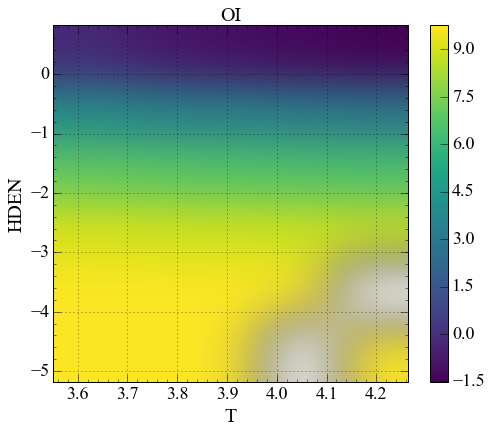

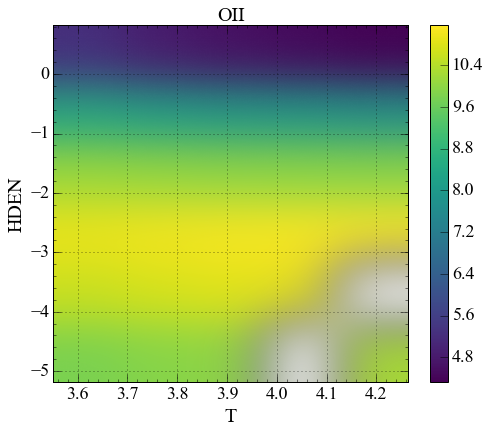

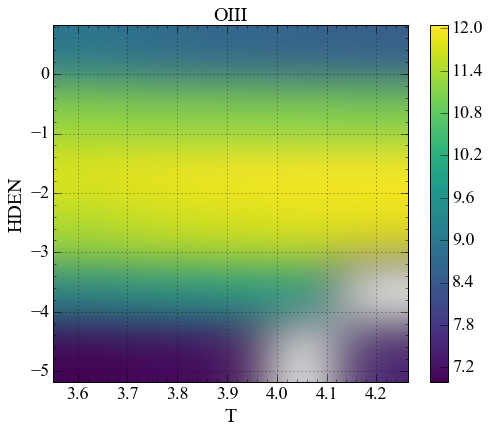

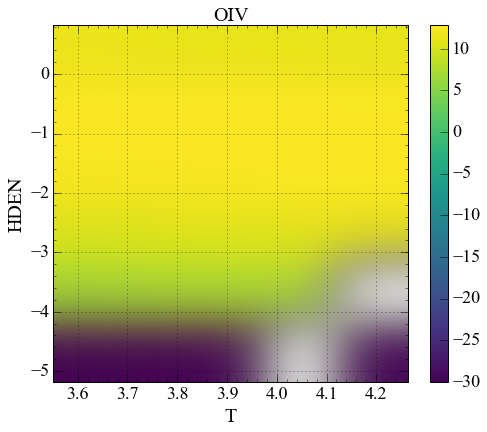

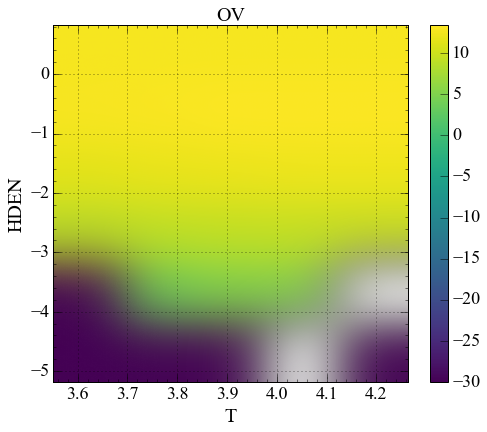

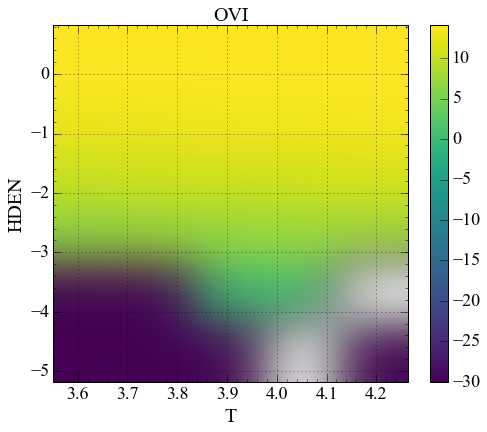

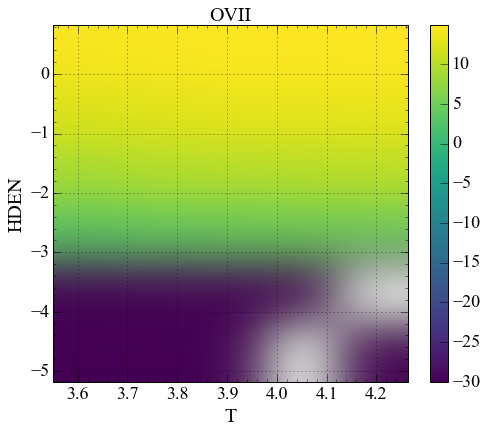

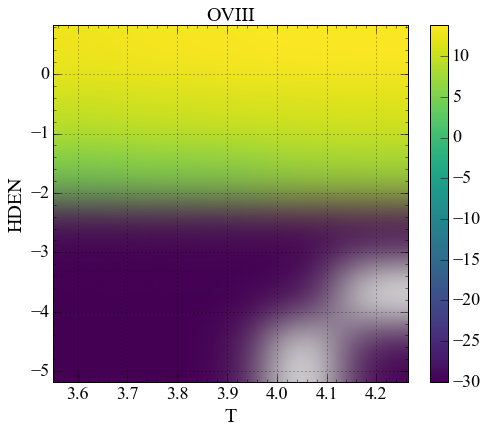

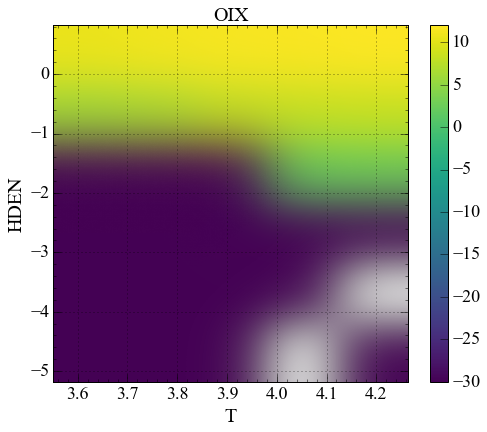

In [12]:
colu = data.columns
for col in colu[21:30]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title(col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()

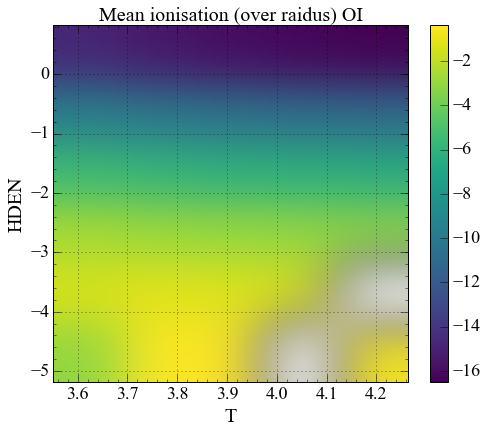

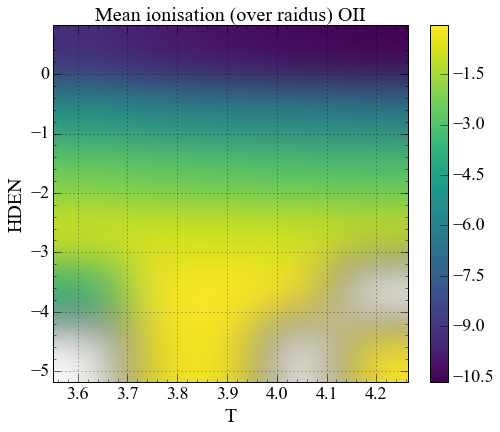

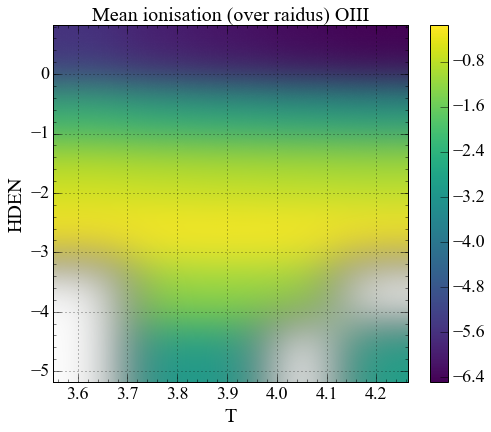

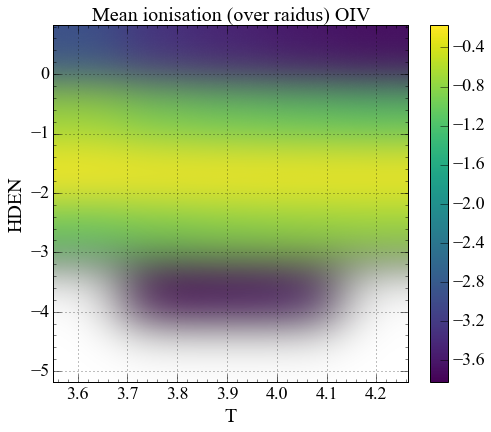

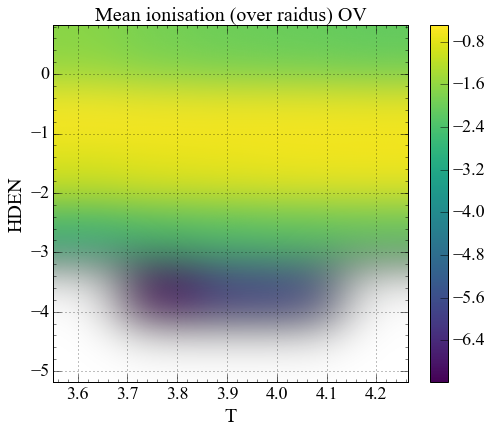

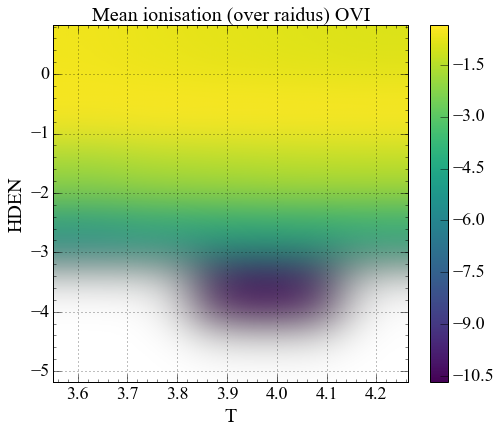

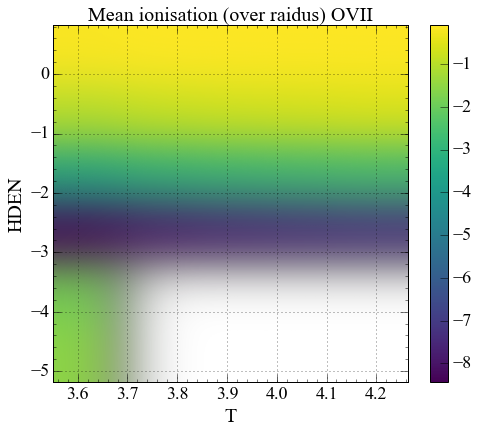

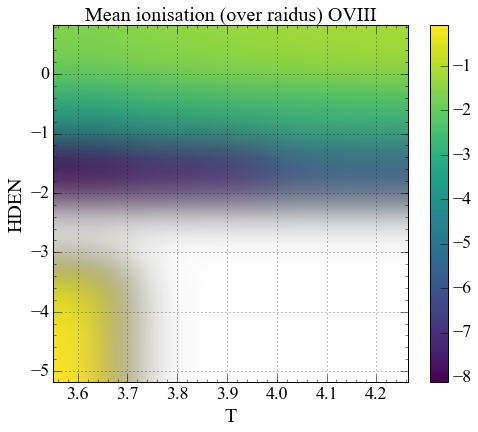

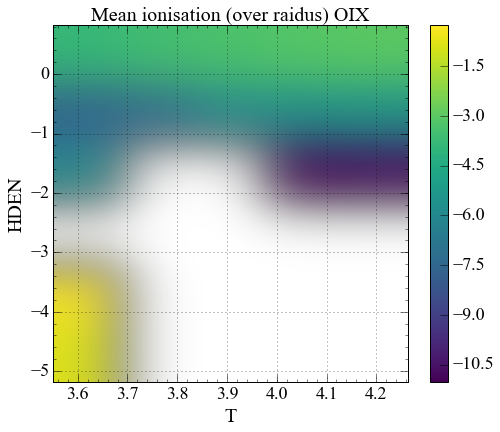

In [13]:
colu = data_ion_fraction.columns
for col in colu[20:29]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data_ion_fraction[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.viridis)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title("Mean ionisation (over raidus) " + col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()

# Magnesium [Mg]

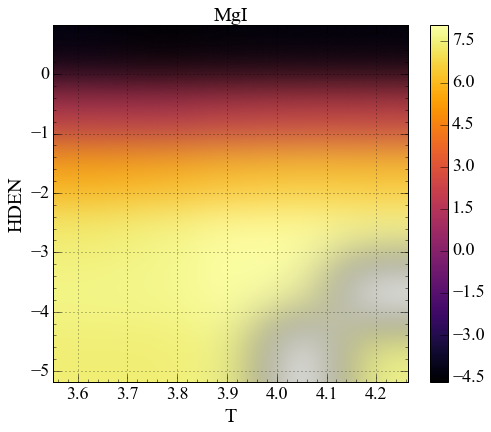

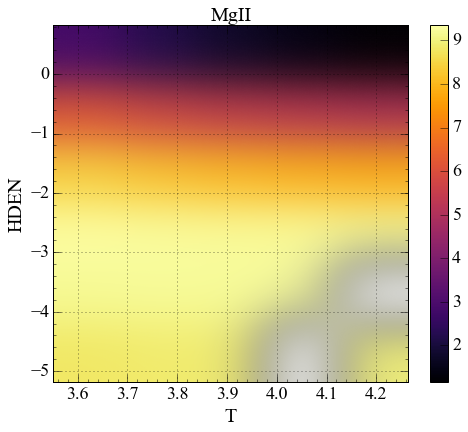

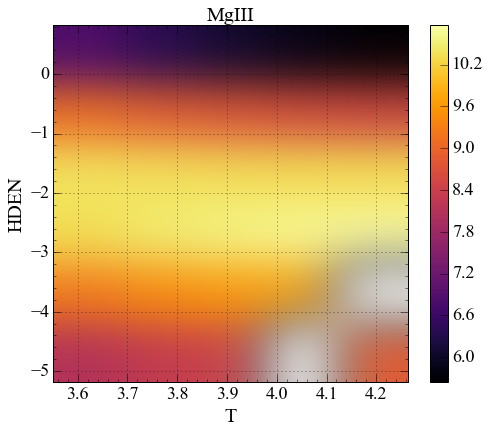

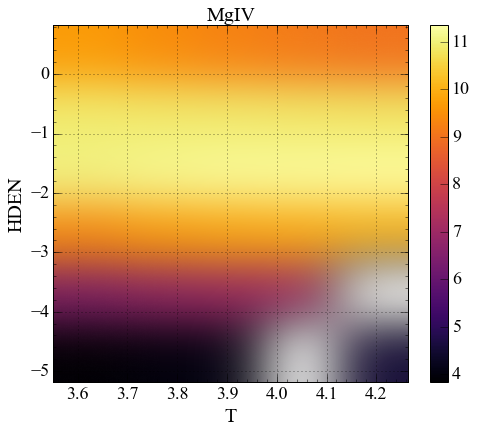

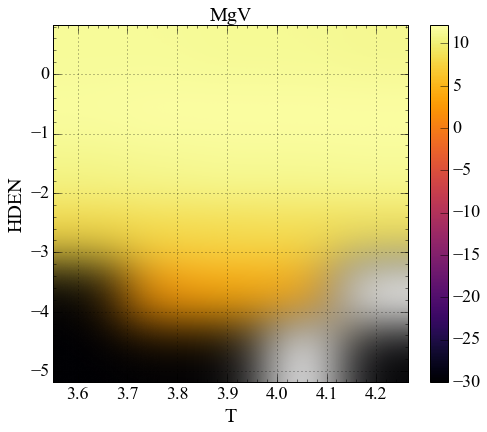

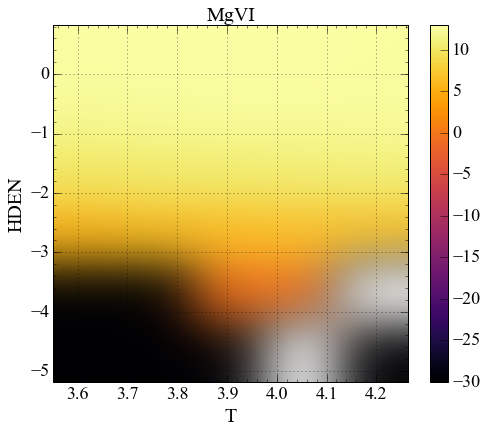

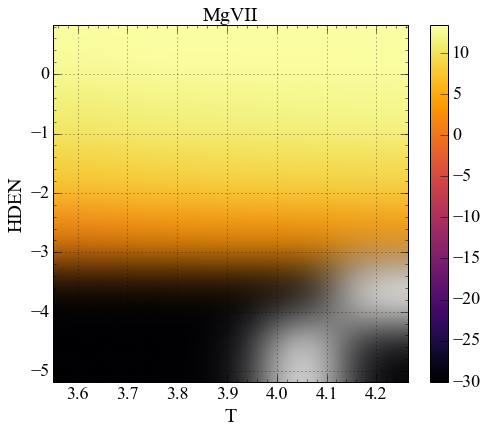

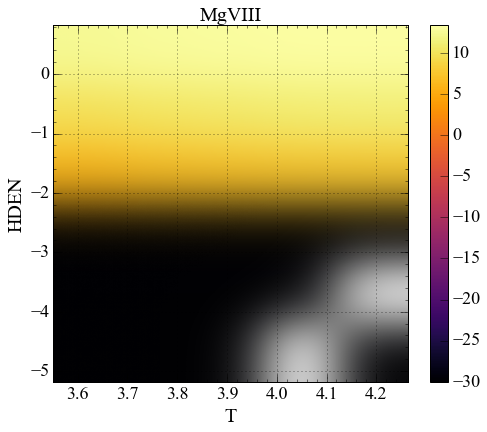

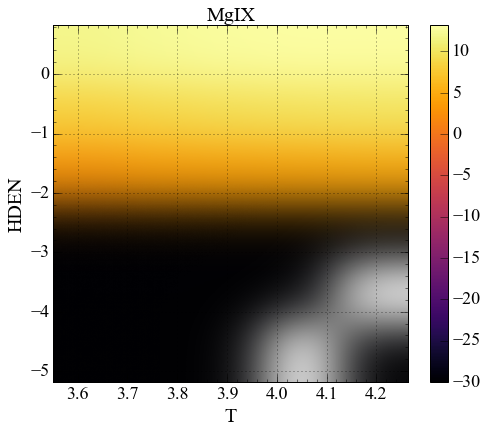

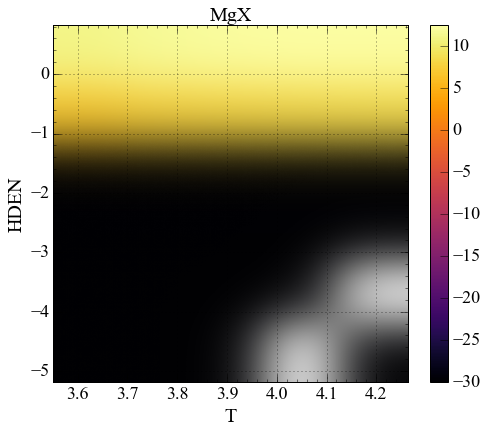

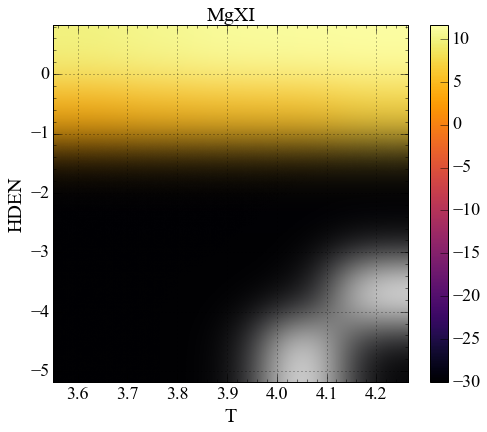

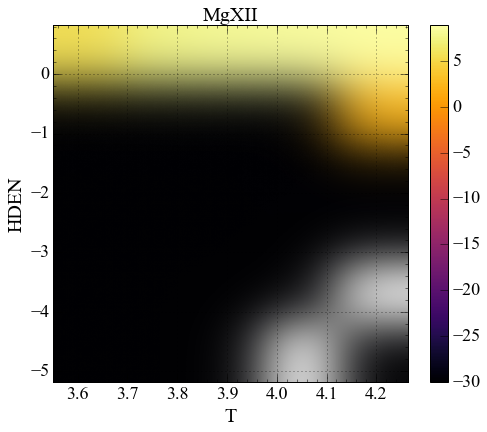

In [14]:
colu = data.columns
for col in colu[30:42]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.inferno)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title(col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()

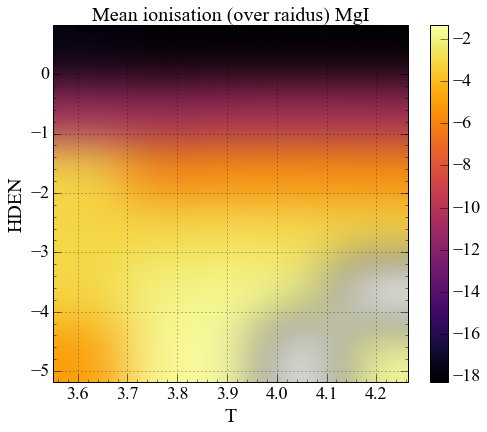

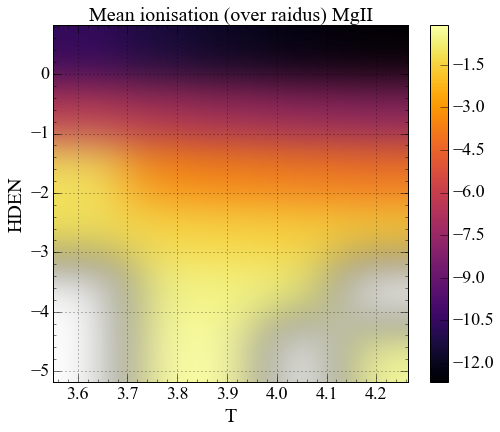

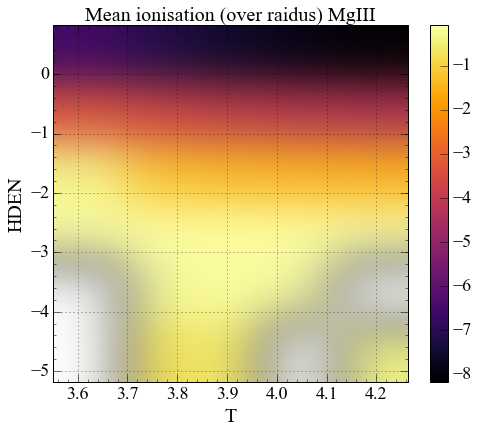

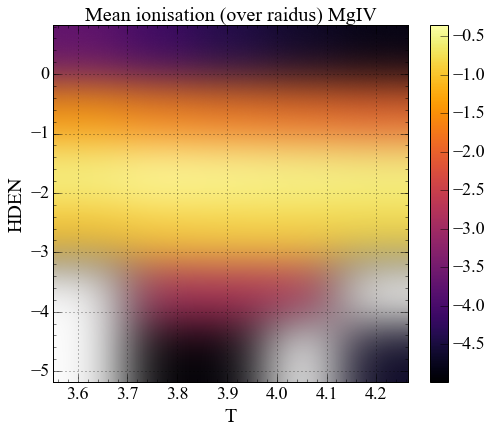

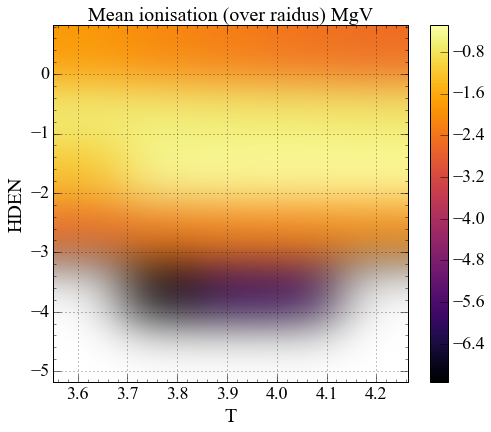

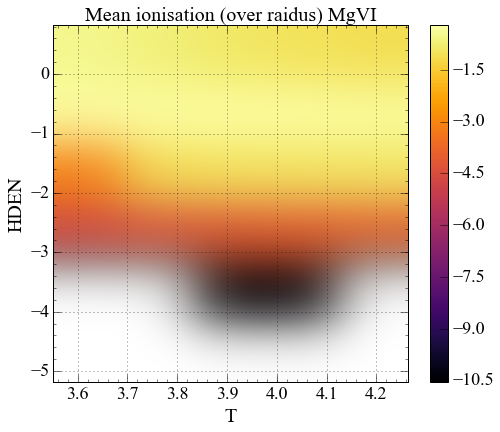

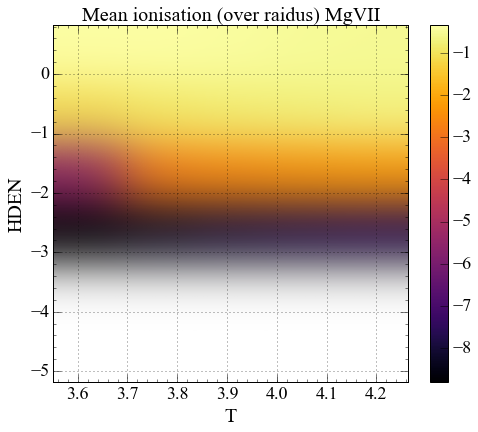

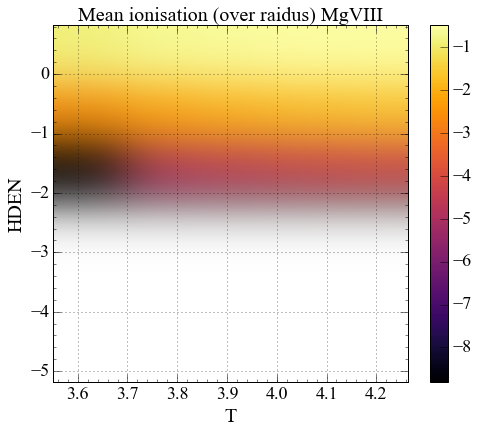

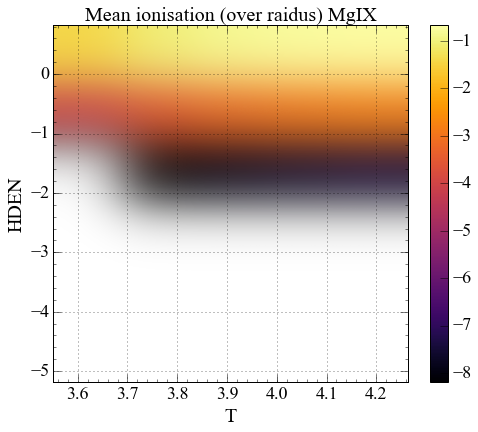

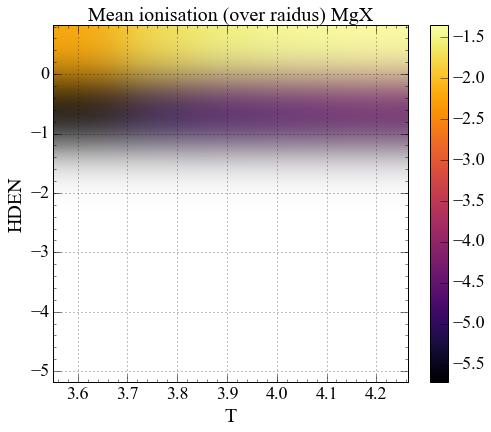

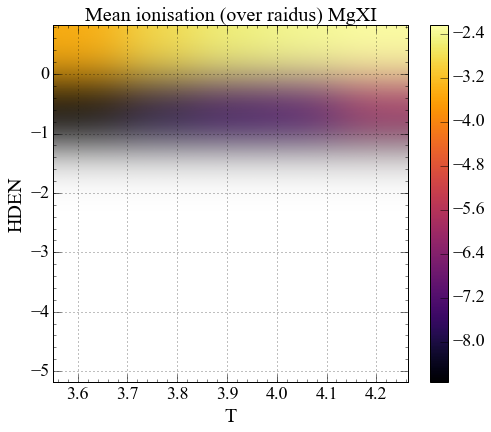

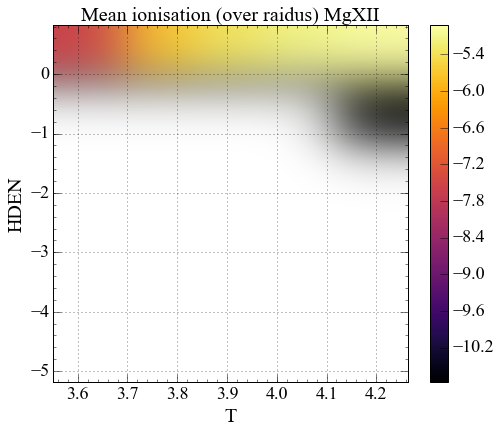

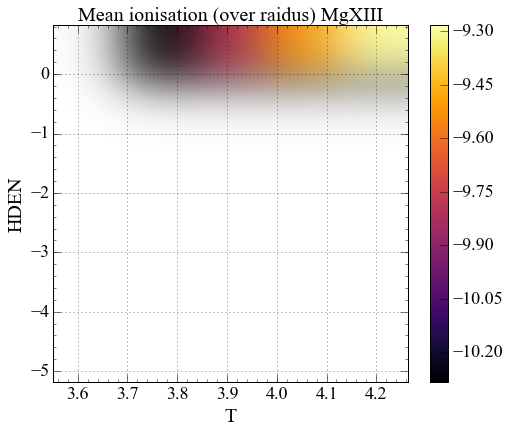

In [15]:
colu = data_ion_fraction.columns
for col in colu[29:42]:
    plt.figure(1, figsize=(8,6))
    map_C0 = np.array(data_ion_fraction[col]).reshape((5,6))
    plt.imshow(map_C0.T, interpolation='gaussian', extent = extent, aspect = 'auto', cmap = plt.cm.inferno)
    plt.colorbar(mappable=None)
    #print(map_C0)
    plt.grid(True)
    plt.minorticks_on()
    plt.title("Mean ionisation (over raidus) " + col)
    plt.xlabel('T')
    plt.ylabel('HDEN')
    plt.show()